In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#Import data
train = pd.read_csv("Data\Housing_dataset_train.csv")
test = pd.read_csv("Data\Housing_dataset_test.csv")
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [11]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
ind                 0
dtype: int64

In [2]:
train['ind'] = 1
test['ind'] = 0

# Concatenate train and test DataFrames
combined_df = pd.concat([train, test])

# Output the combined DataFrame
combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [10]:
combined_df[['bathroom','bedroom','parking_space','price']].describe()

,bathroom,bedroom,parking_space,price
count,18195.000000,18201.000000,18189.000000,1.400000e+04
mean,3.124815,4.315312,3.157458,2.138082e+06
std,2.035028,2.445600,1.601164,1.083057e+06
min,1.000000,1.000000,1.000000,4.319673e+05
25%,1.000000,2.000000,2.000000,1.393990e+06
50%,2.000000,4.000000,3.000000,1.895223e+06
75%,5.000000,6.000000,4.000000,2.586699e+06
max,7.000000,9.000000,6.000000,1.656849e+07


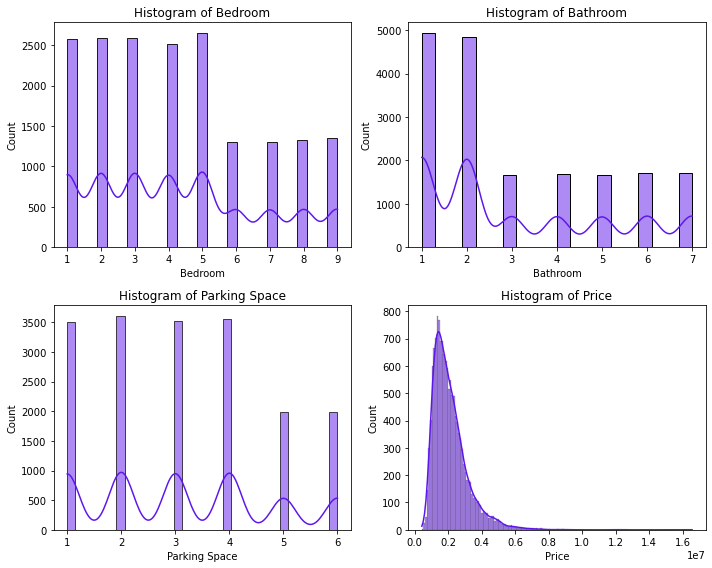

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = combined_df[['bedroom', 'bathroom', 'parking_space', 'price']]

# Set the color for the histograms
hue_color = "#5e17eb"

# Create a 2x2 grid for the histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histogram for 'bedroom'
sns.histplot(data['bedroom'], color=hue_color, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Bedroom')
axes[0, 0].set_title('Histogram of Bedroom')

# Histogram for 'bathroom'
sns.histplot(data['bathroom'], color=hue_color, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Bathroom')
axes[0, 1].set_title('Histogram of Bathroom')

# Histogram for 'parking_space'
sns.histplot(data['parking_space'], color=hue_color, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Parking Space')
axes[1, 0].set_title('Histogram of Parking Space')

# Histogram for 'price'
sns.histplot(data['price'], color=hue_color, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_title('Histogram of Price')

plt.tight_layout()
plt.savefig('plots/num_histograms.png')
plt.show()


In [22]:
combined_df[['loc','title']].describe()

,loc,title
count,18187,18278
unique,36,10
top,Anambra,Flat
freq,543,2026


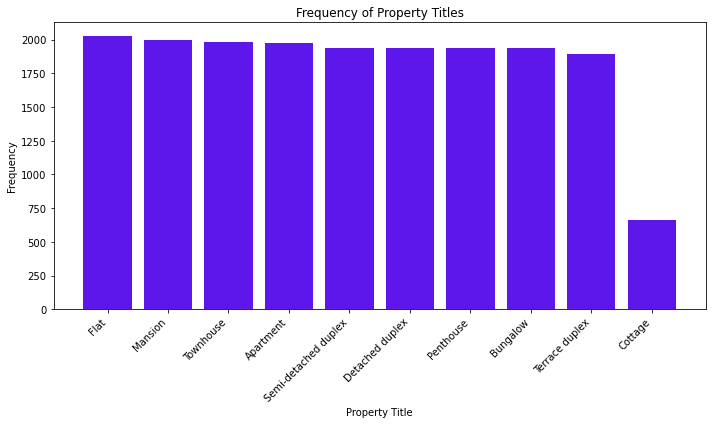

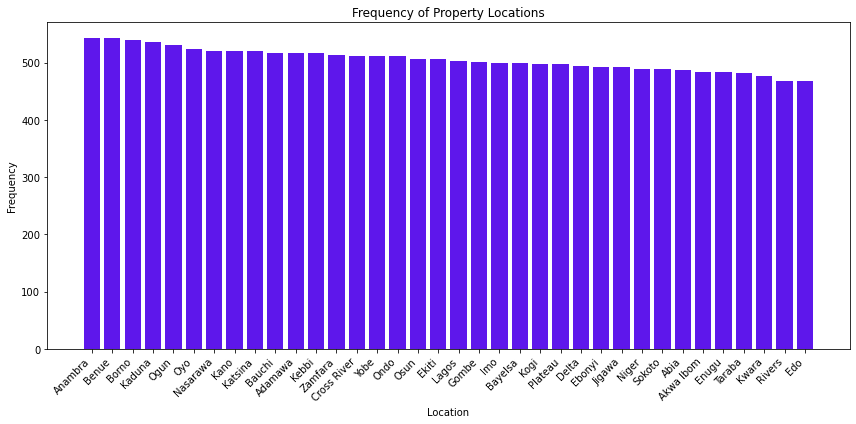

In [27]:
import matplotlib.pyplot as plt

# Value counts of 'title' and 'loc' columns
title_counts = combined_df['title'].value_counts()
loc_counts = combined_df['loc'].value_counts()

# Plotting bar chart for 'title'
plt.figure(figsize=(10, 6))
plt.bar(title_counts.index, title_counts.values, color='#5e17eb')
plt.xlabel('Property Title')
plt.ylabel('Frequency')
plt.title('Frequency of Property Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots/title_bar.png')
plt.show()

# Plotting bar chart for 'loc'
plt.figure(figsize=(12, 6))
plt.bar(loc_counts.index, loc_counts.values, color='#5e17eb')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Frequency of Property Locations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots/loc_bar.png')
plt.show()


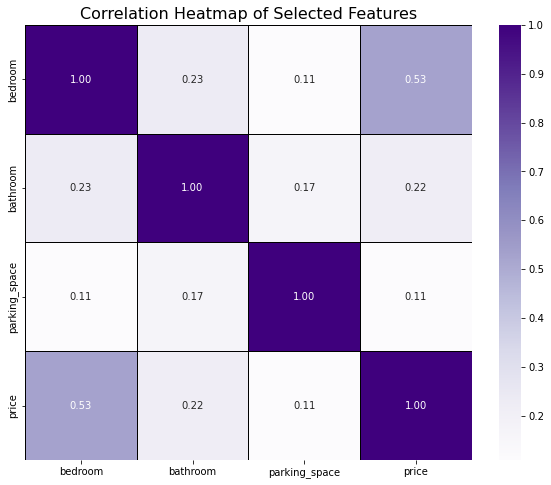

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Select the relevant features for the correlation heatmap
selected_features = combined_df[['bedroom', 'bathroom', 'parking_space', 'price', 'loc']]

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt='.2f', linewidths=0.5, linecolor='black')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
plt.savefig('plots/heat_map_eda.png')
# Show the plot
plt.show()


In [29]:
correlation_matrix

,bedroom,bathroom,parking_space,price
bedroom,1.000000,0.234478,0.109740,0.529145
bathroom,0.234478,1.000000,0.170285,0.221544
parking_space,0.109740,0.170285,1.000000,0.109211
price,0.529145,0.221544,0.109211,1.000000


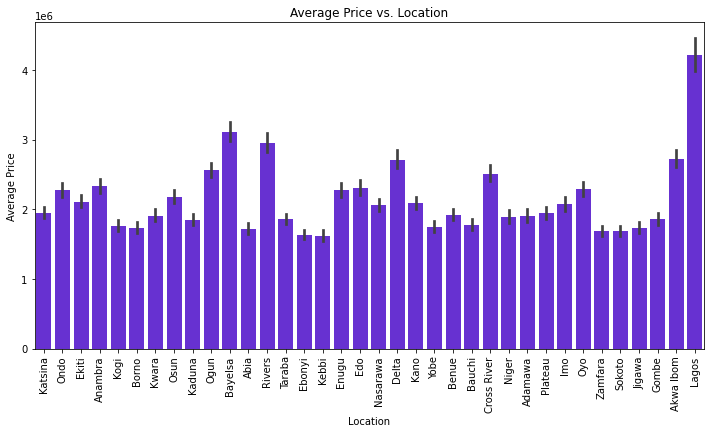

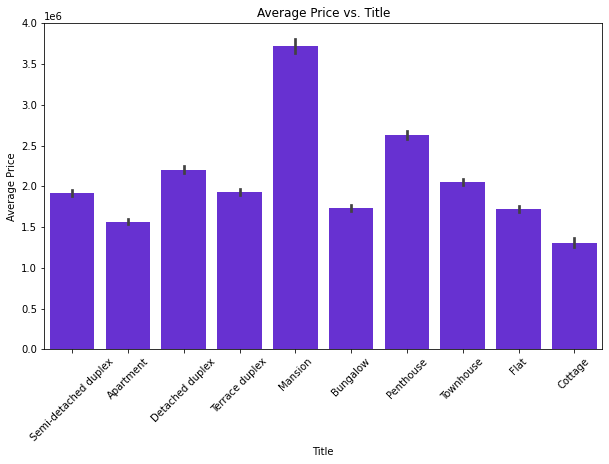

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between 'loc' and 'price'
plt.figure(figsize=(12, 6))
sns.barplot(x='loc', y='price', data=combined_df, color ='#5e17eb')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price vs. Location')
plt.xticks(rotation=90)
plt.savefig('plots/Average Price vs. Location.png')
plt.show()

# Relationship between 'title' and 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='price', data=combined_df, color ='#5e17eb')
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price vs. Title')
plt.xticks(rotation=45)
plt.savefig('plots/Average Price vs. Title.png')
plt.show()
